# data analysis and wrangling


## Imports

In [11]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


## Load Data

In [12]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
combine = [train_df , test_df]
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Wrangle data

In [13]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [15]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Lady', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Sir', 'Mr')
    dataset['Title'] = dataset['Title'].replace('^(?!.*(Miss|Mrs|Mr|Master)).*$', 'Rare',regex=True)
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.158301
3,Mrs,0.793651
4,Rare,0.285714


In [7]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [17]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [18]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mrs
4,0,3,0,35.0,0,0,8.0500,S,Mr


## Completing a numerical continuous feature¶


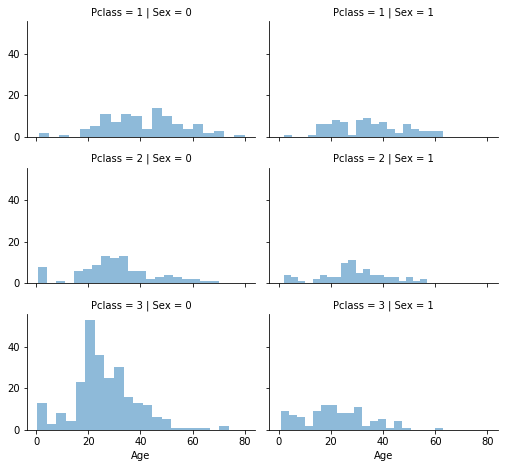

In [19]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

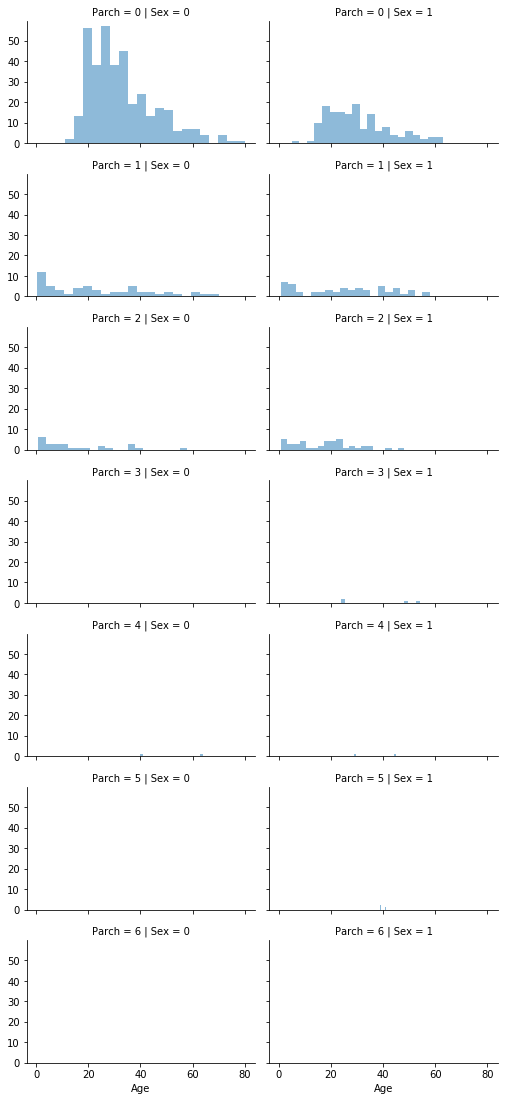

In [20]:
grid = sns.FacetGrid(train_df, row='Parch', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

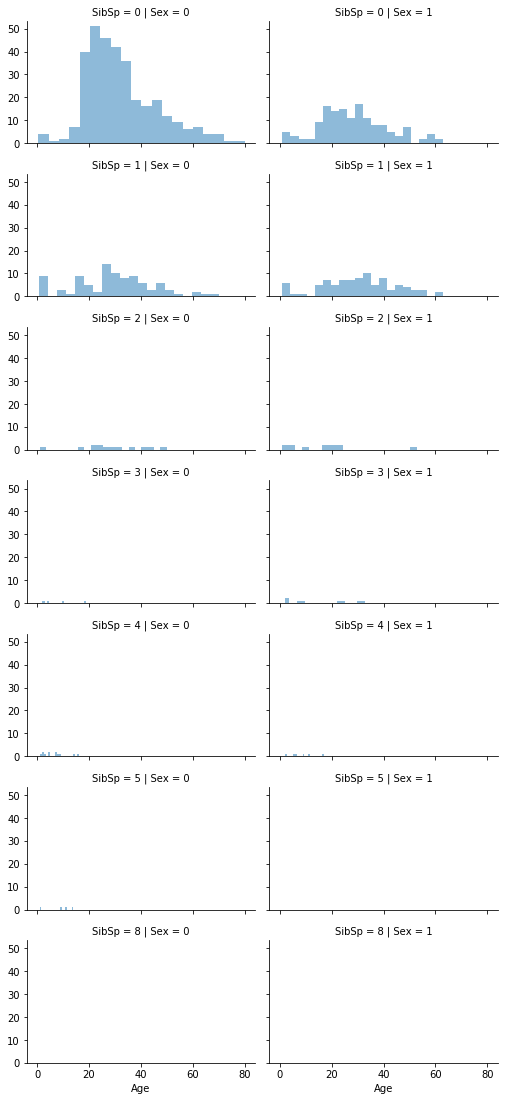

In [21]:
grid = sns.FacetGrid(train_df, row='SibSp', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [69]:
guess_ages = np.zeros((2,7))
guess_ages

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [70]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,7):
            guss_df = dataset[(dataset['Sex'] == i) & (dataset['Parch'] == j)]['Age'].dropna()
            guss_age = guss_df.median()
            if guss_age != guss_age:
                guss_age = dataset[(dataset['Sex'] == i)]['Age'].dropna().median()
            guess_ages[i,j] = int(guss_age/0.5 + 0.5) * 0.5
    for i in range(0,2):
        for j in range(0,7):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i ) & ( dataset.Parch == j), 'Age'] = guess_ages[i,j]
    
    dataset.loc[(dataset.Age.isnull()), 'Age'] = dataset[(dataset['Sex'] == i)]['Age'].dropna().median()           
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,Mr,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,Mrs,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,Miss,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,Mrs,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,Mr,"(32.0, 48.0]"


In [71]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.523810
1,"(16.0, 32.0]",0.348077
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [72]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,Mr,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,Mrs,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,Miss,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,Mrs,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,Mr,"(32.0, 48.0]"


In [73]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,Mr
1,1,1,1,2,1,0,71.2833,C,Mrs
2,1,3,1,1,0,0,7.9250,S,Miss
3,1,1,1,2,1,0,53.1000,S,Mrs
4,0,3,0,2,0,0,8.0500,S,Mr


In [74]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [75]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [76]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,Mr,0
1,1,1,1,2,71.2833,C,Mrs,0
2,1,3,1,1,7.9250,S,Miss,1
3,1,1,1,2,53.1000,S,Mrs,0
4,0,3,0,2,8.0500,S,Mr,1


In [77]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [78]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [79]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [80]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,Mr,0,3
1,1,1,1,2,71.2833,1,Mrs,0,2
2,1,3,1,1,7.9250,0,Miss,1,3
3,1,1,1,2,53.1000,0,Mrs,0,2
4,0,3,0,2,8.0500,0,Mr,1,6


In [81]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,Mr,1,6
1,893,3,1,2,7.0000,0,Mrs,0,6
2,894,2,0,3,9.6875,2,Mr,1,6
3,895,3,0,1,8.6625,0,Mr,1,3
4,896,3,1,1,12.2875,0,Mrs,0,3


In [82]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [83]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,Mr,0,3
1,1,1,1,2,3,1,Mrs,0,2
2,1,3,1,1,1,0,Miss,1,3
3,1,1,1,2,3,0,Mrs,0,2
4,0,3,0,2,1,0,Mr,1,6
5,0,3,0,1,1,2,Mr,1,3
6,0,1,0,3,3,0,Mr,1,3
7,0,3,0,0,2,0,Master,0,0
8,1,3,1,1,1,0,Mrs,0,3
9,1,2,1,0,2,1,Mrs,0,0


In [84]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


## Model, predict and solve¶
